<a href="https://colab.research.google.com/github/Samarth1337/Web_Traffic_Forecasting/blob/main/web_traffic_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Web Traffic Forecasting

## Understanding the Problem Statement
In order to dynamically manage resources to run any website, we need to have an idea about the number of visitors who might arrive at our website at different points in time. So, the problem at hand is to predict the web traffic or number of sessions in the next hour based on the historical data.

## Load Dataset


In [ ]:
import pandas as pd
import numpy as np

data=pd.read_csv('webtraffic.csv')

In [ ]:
data.shape

(4896, 2)

In [ ]:
data.head()

,Hour Index,Sessions
0,0,1418159421
1,1,1113769116
2,2,919158921
3,3,822352824
4,4,735526737


## Data Exploration

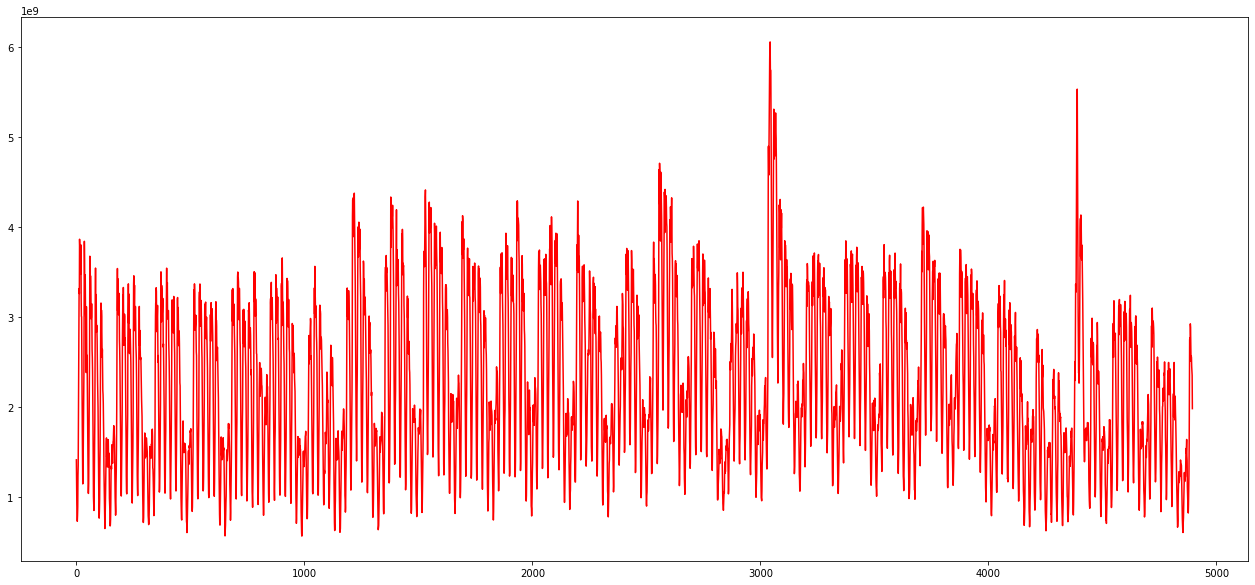

In [ ]:
import matplotlib.pyplot as plt
sessions = data['Sessions'].values

# plot entire data
ar = np.arange(len(sessions))
plt.figure(figsize=(22,10))
plt.plot(ar, sessions,'r')
plt.show()

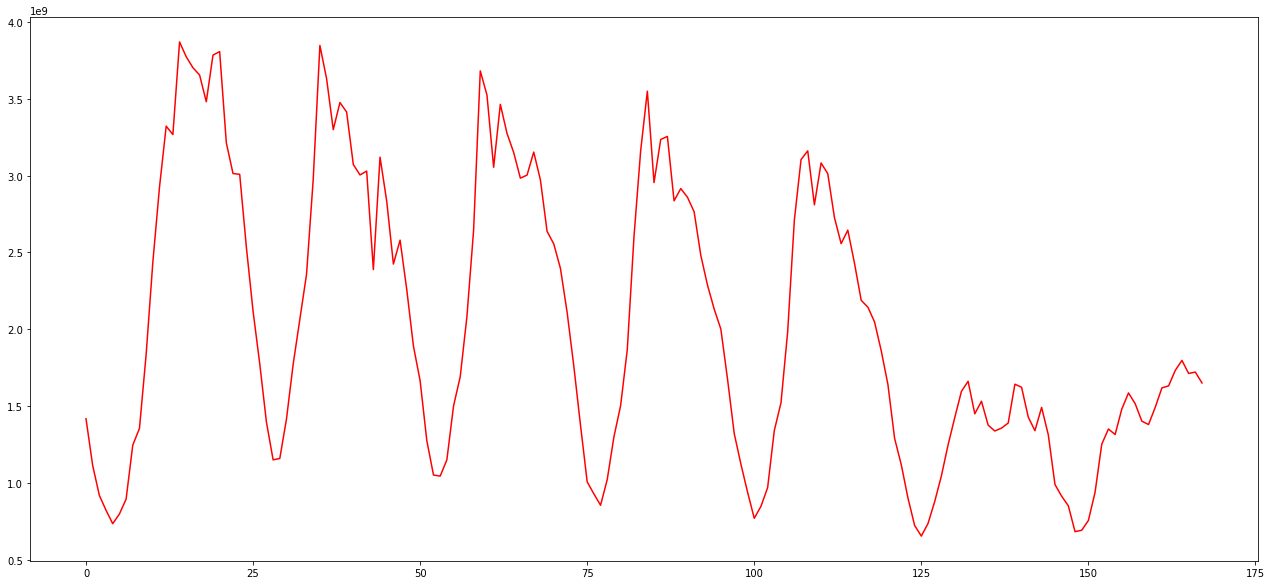

In [ ]:
# first week web traffic
sample = sessions[:168]
ar = np.arange(len(sample))
plt.figure(figsize=(22,10))
plt.plot(ar, sample,'r')
plt.show()

## Data Preparation

Model the problem to predict the traffic for the next hour based on the previous week data i.e. 168 hours. Lets define a function to prepare the input and output data accordingly.

*The input is a sequence of values and the output is a single value.*

In [ ]:

def prepare_data(seq,num):
  x=[]
  y=[]

  for i in range(0,(len(seq)-num),1):
    
    input_ = seq[i:i+num]
    output  = seq[i+num]
    
    x.append(input_)
    y.append(output)
    
  return np.array(x), np.array(y)

In [ ]:
x,y= prepare_data(sessions,168)

In [ ]:
print(len(x))

4728


In [ ]:
x[0]

array([1418159421, 1113769116,  919158921,  822352824,  735526737,
        798400800,  895206897, 1246503249, 1355285358, 1836321840,
       2435122440, 2925140931, 3321347328, 3266457273, 3869249877,
       3772443780, 3701585709, 3653681661, 3480029487, 3783421791,
       3806375814, 3212565219, 3012965019, 3007975014, 2532926538,
       2117758122, 1775443779, 1396203399, 1150695153, 1159677162,
       1416163419, 1772449776, 2063866068, 2357278362, 2974042980,
       3846295854, 3630727638, 3298393305, 3475039482, 3413163420,
       3071847078, 3003983010, 3028933035, 2388216393, 3119751126,
       2833324839, 2424144429, 2579832585, 2257478262, 1890213894,
       1664665668, 1275445278, 1051893054, 1044907047, 1150695153,
       1500993504, 1691611695, 2081830086, 2642706648, 3680627688,
       3523941531, 3053883060, 3463063470, 3274441281, 3149691156,
       2983024989, 3002985009, 3152685159, 2971048977, 2636718642,
       2554882560, 2395202400, 2108776113, 1759475763, 1375245

In [ ]:
y[0]

1427141430

In [ ]:
ind = int(0.9 * len(x))

# training set
x_tr = x[:ind]
y_tr = y[:ind]

# validation set
x_val=x[ind:]
y_val=y[ind:]

In [ ]:
from sklearn.preprocessing import StandardScaler

#normalize the inputs
x_scaler= StandardScaler()
x_tr = x_scaler.fit_transform(x_tr)
x_val= x_scaler.transform(x_val)

#reshaping the output for normalization
y_tr=y_tr.reshape(len(y_tr),1)
y_val=y_val.reshape(len(y_val),1)

#normalize the output
y_scaler=StandardScaler()
y_tr = y_scaler.fit_transform(y_tr)[:,0]
y_val = y_scaler.transform(y_val)[:,0]

In [ ]:
print(x_tr.shape)

(4255, 168)


The input data is a 2D array but LSTM accepts only 3D inputs in the form of (no. of samples, no. of timesteps, no. of features)

So, reshaping

In [ ]:
#reshaping input data
x_tr= x_tr.reshape(x_tr.shape[0],x_tr.shape[1],1)
x_val= x_val.reshape(x_val.shape[0],x_val.shape[1],1)

In [ ]:
print(x_tr.shape)

(4255, 168, 1)





## Model Building


In [ ]:
from keras.models import *
from keras.layers import *
from keras.callbacks import *

# define LSTM model
model =  Sequential()
model.add(LSTM(128,input_shape=(168,1)))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear'))

*For CNN model :*

In [ ]:
#from keras.models import *
#from keras.layers import *
#from keras.callbacks import *

#model= Sequential()

#model.add(Conv1D(64, 3, padding='same', activation='relu',input_shape=(num,1)))

#model.add(Conv1D(32, 5, padding='same', activation='relu',input_shape=(num,1)))

#model.add(Flatten())

#model.add(Dense(64,activation='relu'))
#model.add(Dense(1,activation='linear'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 74,881
Trainable params: 74,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse',optimizer='adam')

In [ ]:
mc = ModelCheckpoint('best_model.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [ ]:
history=model.fit(x_tr, y_tr ,epochs=30, batch_size=32, validation_data=(x_val,y_val), callbacks=[mc])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 4255 samples, validate on 473 samples
Epoch 1/30





4255/4255 [==============================] - 49s 12ms/step - loss: 0.1347 - val_loss: 0.0366

Epoch 00001: val_loss improved from inf to 0.03659, saving model to best_model.hdf5
Epoch 2/30
4255/4255 [==============================] - 42s 10ms/step - loss: 0.0425 - val_loss: 0.0288

Epoch 00002: val_loss improved from 0.03659 to 0.02876, saving model to best_model.hdf5
Epoch 3/30
4255/4255 [==============================] - 41s 10ms/step - loss: 0.0367 - val_loss: 0.0273

Epoch 00003: val_loss improved from 0.02876 to 0.02728, saving model to best_model.hdf5
Epoch 4/30
4255/4255 [==============================] - 41s 10ms/step - loss: 0.0338 - val_loss: 0.0246

Epoch 00004: val_loss improved from 0.02728 to 0.02458, saving model to best_model.hdf5
Epoch 5/30
4255/4255 [==============================] - 41s 10ms/step - loss: 0.030

In [ ]:
model.load_weights('best_model.hdf5')

In [ ]:
mse = model.evaluate(x_val,y_val)
print("Mean Square Error:",mse)

473/473 [==============================] - 1s 3ms/step
Mean Square Error: 0.01505724721869757


## Comparision with Baseline Model

In [ ]:
# build a simple moving average model
def compute_moving_average(data):
  pred=[]
  for i in data:
    avg=np.sum(i)/len(i)
    pred.append(avg)
  return np.array(pred)

# reshape the data
x_reshaped = x_val.reshape(-1,168)

# get predictions
y_pred = compute_moving_average(x_reshaped)

In [ ]:
mse = np.sum ( (y_val - y_pred) **2 ) / (len(y_val))
print(mse)

0.5546025834434455


<br>

## Forecasting

**Steps**:

1. Intialize the array, say "data" with a weeks data
2. Predict for the next hour
3. Append the predicted value as the last element of array "data"
4. Skip the first element of array "data"
5. Repeat steps 2 to 4 for **N** iterations


In [ ]:
def forecast(x_val, no_of_pred, ind):
  predictions=[]

  #intialize the array with a weeks data
  temp=x_val[ind]

  for i in range(no_of_pred): 

    #predict for the next hour
    pred=model.predict(temp.reshape(1,-1,1))[0][0]
    
    #append the prediction as the last element of array
    temp = np.insert(temp,len(temp),pred)
    predictions.append(pred)

    #ignore the first element of array
    temp = temp[1:]

  return predictions

In [ ]:
no_of_pred =24
ind=72
y_pred= forecast(x_val,no_of_pred,ind)

In [ ]:
y_true = y_val[ind:ind+(no_of_pred)]

In [ ]:
y_true= y_scaler.inverse_transform(y_true)
y_pred= y_scaler.inverse_transform(y_pred)

In [ ]:
def plot(y_true,y_pred):
  ar = np.arange(len(y_true))
  plt.figure(figsize=(22,10))
  plt.plot(ar, y_true,'r')r
  plt.plot(ar, y_pred,'y')
  plt.show()

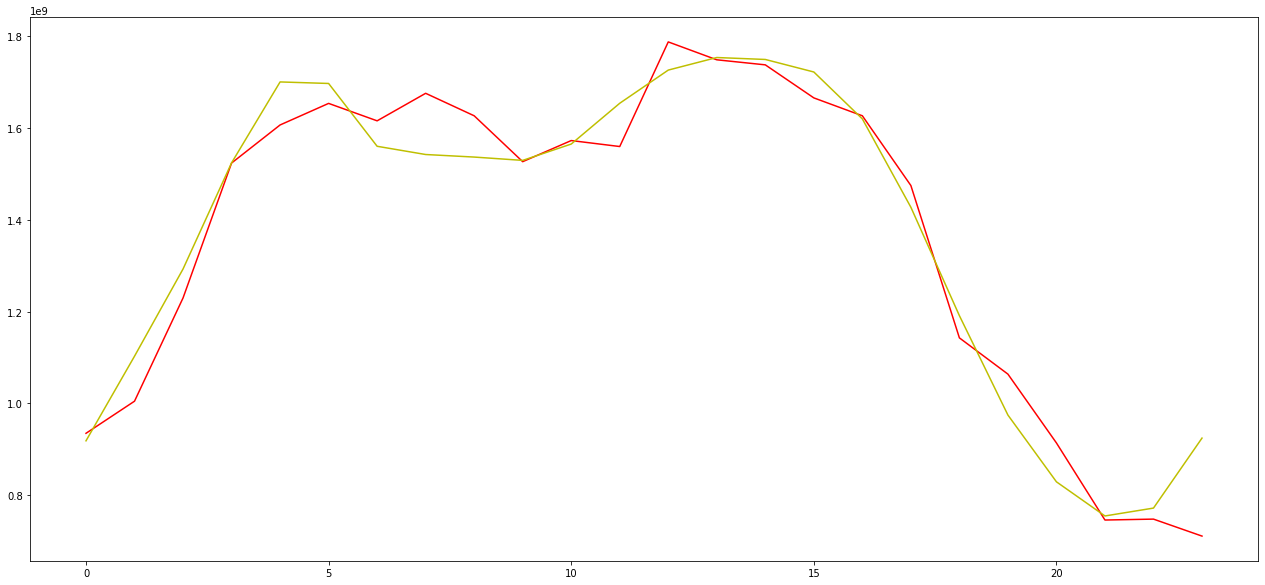

In [ ]:
plot(y_true,y_pred)